# Understanding Singular Value Decomposition

Let $A\in\mathbb{R}^{m\times n}$ be a matrix; and $U\in\mathbb{R}^{m\times r}$, $\Sigma \in \mathbb{R}^{r\times r}$ and $V\in\mathbb{R}^{n\times r}$ be matrices, such that
$$A=U \Sigma V^T$$


where 

+ $\Sigma$ is a diagonal matrix and contains ***singular values*** that are ordered in decreasing order.

+ ***V*** contains ***right singular vectors***.

+ ***U*** contains ***left singular vectors***.
+ ***U***, ***V***: are orthonormals hence $U^TU=I$ and $V^TV=I$




![<svd name here>](svd.png)

### Three equations to use for SVD
1. $A^TA= V\Sigma^T U^T U \Sigma V^T= V (\Sigma^T \Sigma)V^T$ as U is an orthogonal matrix $U^TU=1$. Equivalently, $AA^T= U\Sigma V^TV\Sigma^T U^T = U (\Sigma^T \Sigma) U^T$ as V is an orthogonal matrix $V^TV=1$.

2. $AV = U\Sigma$ because $V^T$ is just moved to the left-hand side of equation.


# Lets calculate Singular Value Decomposition



$$
A=\left[\begin{array}{cc} 
5 & 5\\
-1 & 7
\end{array}\right]
$$ 

+ $A^TA=V (\Sigma^T \Sigma)V^T$ as U is orthogonal matrix $U^TU=1$. Given A and its transpose, we have

$$
A^TA=\left[\begin{array}{cc} 
26 & 18\\
18 & 74
\end{array}\right]=V\Sigma^T\Sigma V^T
$$ 




## Finding $V$ and $\Sigma$ through eigenvalues and eigenvectors of $A^T A$




#### Finding eigenvalues of $A^T A$
Eigenvalues of $A^T A$ are 20 and 80 that are simply found by $det[A^TA-\lambda I]=0$. $\Sigma$ is square root of eigen values along the diagonal
$$\Sigma=\left[\begin{array}{cc} 
\sqrt{80} & 0\\
0 & \sqrt{20}
\end{array}\right] = \left[\begin{array}{cc} 
4\sqrt{5} & 0\\
0 & 2\sqrt{5}
\end{array}\right]
.$$

#### Finding eigenvectors of $A^T A$

$$[A^TA - 80I] \cdot \left[\begin{array}{cc} 
x_1\\
x_2
\end{array}\right]
=\left[\begin{array}{cc} 
0\\
0
\end{array}\right] \implies V_1
$$

$$[A^TA - 20I] \cdot \left[\begin{array}{cc} 
x_1\\
x_2
\end{array}\right]
=\left[\begin{array}{cc} 
0\\
0
\end{array}\right] \implies V_2$$

where solution is
$$V=\left[\begin{array}{cc} 
1/_\sqrt{10} & ^3/_\sqrt{10}\\
^3/_\sqrt{10} & -1/_\sqrt{10}
\end{array}\right].
$$

In [1]:
import numpy as np
A = np.array([[5, 5],[-1,7]])
sigma=np.array([[np.sqrt(80),0],
                [0,np.sqrt(20)]])

V=np.array([[1/np.sqrt(10),3/np.sqrt(10)],
              [3/np.sqrt(10),-1/np.sqrt(10)]])

$A^TA=V (\Sigma^T \Sigma)V^T$ 

In [2]:
print(A.T@A)

[[26 18]
 [18 74]]


In [3]:
print(V@(sigma.T@sigma)@V.T)

[[26. 18.]
 [18. 74.]]




## Let's find $U$ via $AV = U\Sigma$

$$
\left[\begin{array}{cc} 
5 & 5\\
-1 & 7
\end{array}\right]
\left[\begin{array}{cc} 
^1/_\sqrt{10} & ^3/_\sqrt{10}\\
^3/\sqrt{10} & ^-1/_\sqrt{10}
\end{array}\right]=\left[\begin{array}{cc} 
20/\sqrt{10} & 10/\sqrt{10}\\
20/\sqrt{10} & -10/_\sqrt{10}
\end{array}\right]
$$ 


The entries of $U\Sigma$ needed to be unit length.
<br>
*** In order to obtain U matrix we have to make the entries of U times Sigma unit length.***

$$
\left[\begin{array}{cc} 
^1/_\sqrt{2} & ^1/_\sqrt{2}\\
^1/_\sqrt{2} & -^1/_\sqrt{2}
\end{array}\right]
\left[\begin{array}{cc} 
4\sqrt{5}  & 0\\
0 & 2\sqrt{5}
\end{array}\right]=\left[\begin{array}{cc} 
^1/_\sqrt{2} & ^1/_\sqrt{2}\\
^1/_\sqrt{2} & -^1/_\sqrt{2}
\end{array}\right]
$$ 

$$U=\left[\begin{array}{cc} 
^1/_\sqrt{2} & ^1/_\sqrt{2}\\
^1/_\sqrt{2} & -^1/_\sqrt{2}
\end{array}\right]
=\left[\begin{array}{cc} 
0.70710678 & 0.70710678\\
0.70710678 & -0.70710678
\end{array}\right]$$

In [4]:
U=A@V@np.linalg.inv(sigma)
U

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [5]:
U@sigma@V.T

array([[ 5.,  5.],
       [-1.,  7.]])

## For application purposes Numpy does the trick

In [6]:
U, s, V_T = np.linalg.svd(A)
m, n = A.shape
D = np.concatenate((np.diag(s), np.zeros((m - len(s), n))))
np.dot(U, np.dot(D, V_T))

array([[ 5.,  5.],
       [-1.,  7.]])

# Singluar Value Decomposition and Applications

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

Pixels:  1024 * 768


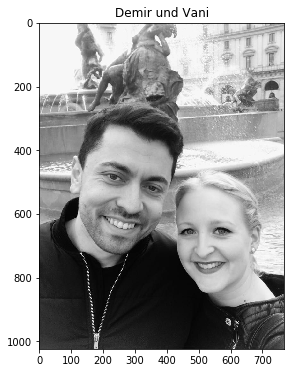

In [8]:
# Its me and my girlfriend in Rome :)
imggray = Image.open('dv.jpg').convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.title("Demir und Vani")
plt.imshow(imgmat, cmap='gray');

print("Pixels: ", imgmat.shape[0],"*",imgmat.shape[1])

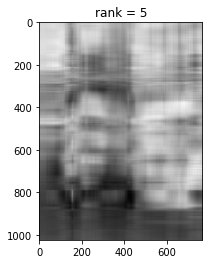

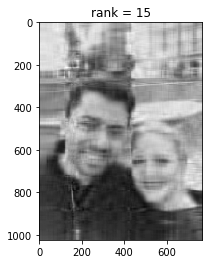

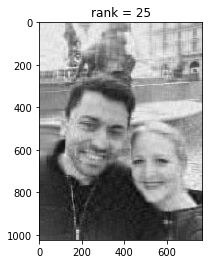

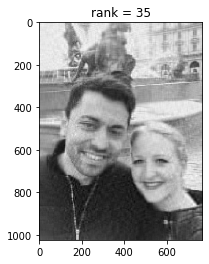

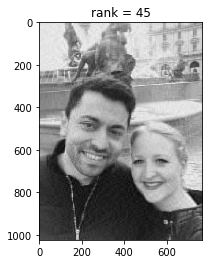

In [9]:
U, sigma, V = np.linalg.svd(imgmat)
for i in range(5, 51, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "rank = %s" % i
    plt.title(title)
    plt.show()

# Let's apply Singular Value Decomposition on Rgb image

In [10]:
from PIL import Image
image = np.array(Image.open('dv.jpg'))
row,col,_ = image.shape

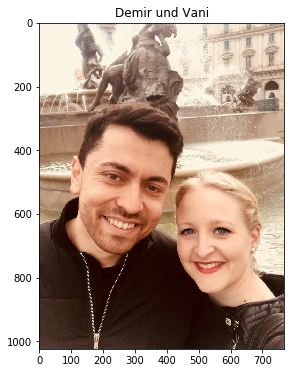

Pixel: 1024 * 768


In [11]:
fig = plt.figure(figsize=(9,6))
a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(image)
a.set_title("Demir und Vani")
plt.show()
print("Pixel:",row,"*",col)

In [12]:
image = image /250 # Selecting Colors RED, Green and Blue values.
image_red = image[:,:,0]
image_green = image[:,:,1]
image_blue = image[:,:,2]

In [13]:
U_r, d_r, V_r = np.linalg.svd(image_red,full_matrices=True)
U_g, d_g, V_g = np.linalg.svd(image_green,full_matrices=True)
U_b, d_b, V_b = np.linalg.svd(image_blue,full_matrices=True)

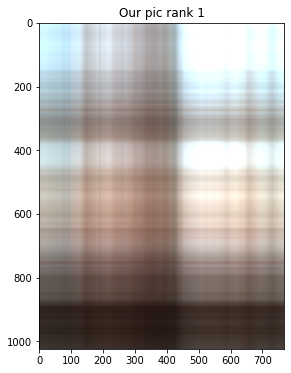

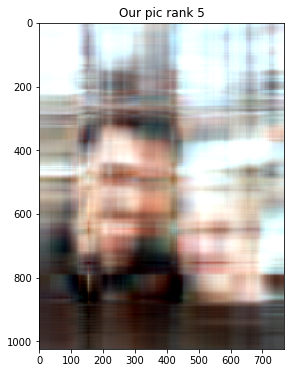

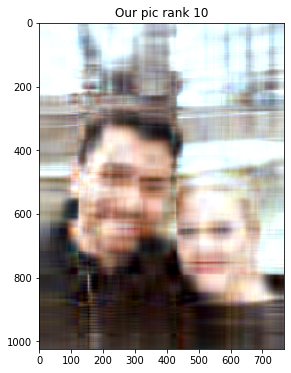

In [ ]:
for rank in [1,5,10,15]:
    U_r_k = U_r[ :,0 : rank]
    V_r_k = V_r[ 0 :rank,:]
    U_g_k = U_g[:,0:rank]
    V_g_k = V_g[0:rank,:]
    U_b_k = U_b[:,0:rank]
    V_b_k = V_b[0:rank,:]
    
    d_r_k = d_r[0:rank]
    d_g_k = d_r[0:rank]
    d_b_k = d_r[0:rank]
    compredssed_bytes = sum(matrix.nbytes for matrix in[U_r_k,d_r_k,V_r_k,U_g_k,d_g_k,V_g_k,U_b_k,d_b_k,V_b_k])
    
    im_red_approx = np.dot(U_r_k,np.dot(np.diag(d_r_k),V_r_k))
    im_green_approx = np.dot(U_g_k,np.dot(np.diag(d_g_k),V_g_k))
    im_blue_approx = np.dot(U_b_k,np.dot(np.diag(d_b_k),V_b_k))

    im_reconstructed = np.zeros((row,col,3))

    im_reconstructed[:,:,0]=im_red_approx
    im_reconstructed[:,:,1]=im_green_approx
    im_reconstructed[:,:,2]=im_blue_approx
    
    im_reconstructed[im_reconstructed < 0 ] = 0
    im_reconstructed[im_reconstructed > 1] = 1
    
    fig = plt.figure(figsize=(9,6))
    a = fig.add_subplot(1,1,1)
    imgplot = plt.imshow(im_reconstructed)
    a.set_title("Our pic rank {0}".format(rank))
    plt.show()


# References


[1] Essence of linear algebra by 3Blue1Brown 
https://www.3blue1brown.com/essence-of-linear-algebra-page <br>

[2] Mining of Massive Datasets Jure Leskovec, Anand Rajaraman, Jeff Ullman
http://www.mmds.org/  <br>

[3] Singular Value Decomposition | Stanford University Jure Leskovec https://www.youtube.com/watch?v=P5mlg91as1c  <br>

[4] Computing the Singular Value Decomposition | MIT 18.06SC Linear Algebra, Fall 2011 
https://www.youtube.com/watch?v=cOUTpqlX-Xs.<br>

[5] Differential Equations and Linear Algebra. https://www.youtube.com/watch?v=mBcLRGuAFUk  <br>

